# Solving Regression Problems

## By Jean-Philippe Pitteloud

### Requirements

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import statsmodels.api as sm
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Data Gathering

In order to complete this assignment, a dataset was retrieved from the Thinkful PostgreSQL database using the following values:

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
house_df = pd.read_sql_query('select * from houseprices',con = engine)

engine.dispose()


house_df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


Once the dataset was read as a Pandas dataframe, an evaluation about the nature of the dataset was conducted programmatically and summary statistics for the numerica variables calculated

In [3]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

In [4]:
house_df.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


As it can be seen fromn the tables above, the working dataset consists of 1460 records and 81 columns, and while most of the variables/columns are quite complete several others report missing values. In ordet to get a better picture about the distribution of numeric and categorical variables in the dataset, the following exploration was conducted

In [5]:
num_cols = house_df.describe().columns
print('These are the categorical variables:\n {}'.format(num_cols))
print('\n There are {} numeric variables in the dataset'.format(len(num_cols)))

These are the categorical variables:
 Index(['id', 'mssubclass', 'lotfrontage', 'lotarea', 'overallqual',
       'overallcond', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'firstflrsf', 'secondflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd',
       'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf',
       'openporchsf', 'enclosedporch', 'threessnporch', 'screenporch',
       'poolarea', 'miscval', 'mosold', 'yrsold', 'saleprice'],
      dtype='object')

 There are 38 numeric variables in the dataset


In terms of numeric variables, the presents 38 columns out of 81 formatted as either 'int' or 'float'

In [6]:
cat_cols = house_df.select_dtypes(['object']).columns
print('These are the categorical variables:\n {}'.format(cat_cols))
print('\n There are {} categorical variables in the dataset'.format(len(cat_cols)))

These are the categorical variables:
 Index(['mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual',
       'functional', 'fireplacequ', 'garagetype', 'garagefinish', 'garagequal',
       'garagecond', 'paveddrive', 'poolqc', 'fence', 'miscfeature',
       'saletype', 'salecondition'],
      dtype='object')

 There are 43 categorical variables in the dataset


From the available 81 columns only 43 are formatted as 'string' or 'object', implying a categorical nature for them

### Data Cleaning

Since the goal of this work is to develop a model that can predict the sale price of houses based on the available variables, the distribution of the target variable 'saleprice' in our dataset was explored. As it can be seen in the plot below, the values in the 'saleprice' variable are not normally distributed and the distribution is skewed to the right with few data points with extremely high values and the majority of the data points concentrated in the lower end of the sale prices

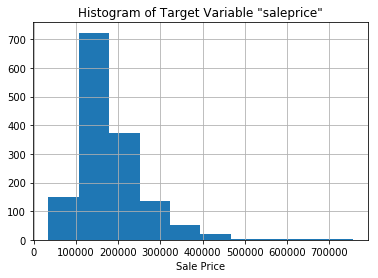

In [21]:
house_df.saleprice.hist()
plt.title('Histogram of Target Variable "saleprice"')
plt.xlabel('Sale Price');

Since our preliminary observations indicated that several columns report missing values, a more detailed exploration was performed using the percentage of missing records in each variables as key metric. Due to the high number of numeric variables, the absolute value of the corralation factor between each numeric variable and the target variable 'saleprice' was also displayed (see below). The resulting dataset was sorted by the magnitude of the observed correlation

In [7]:
perc_na = pd.DataFrame(house_df[num_cols].isnull().sum() / house_df.shape[0], columns = ['percent_missing'])
perc_na['correlation'] = np.abs(house_df[num_cols].corr().loc[:, 'saleprice'])
perc_na.sort_values(ascending = False, by = 'correlation')

,percent_missing,correlation
saleprice,0.000000,1.000000
overallqual,0.000000,0.790982
grlivarea,0.000000,0.708624
garagecars,0.000000,0.640409
garagearea,0.000000,0.623431
totalbsmtsf,0.000000,0.613581
firstflrsf,0.000000,0.605852
fullbath,0.000000,0.560664
totrmsabvgrd,0.000000,0.533723
yearbuilt,0.000000,0.522897


In the table above, it can be seen that the TEN variables MOST correlated to our target variable, are complete in terms of missing values, therefore useful for use in our modeling stage without major cleaning efforts. However, further exploration was conducted into the correlation between each other. In the corraltion matrix displayed below, it can be seen that while most selected variables display at most a moderate correlation (0.30 - 0.50) with others, variables such as 'totrmsabvgrd' and 'grlivarea' have strong correlation (0.83). A similar situation is found between variables 'garagearea' and 'garagecars' (0.88), and between 'totalbsmtsf' and 'firstflrsf' (0.82)

In [8]:
house_df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf', 'firstflrsf', 'fullbath', 'totrmsabvgrd', 'yearbuilt', 'yearremodadd']].corr()

,overallqual,grlivarea,garagecars,garagearea,totalbsmtsf,firstflrsf,fullbath,totrmsabvgrd,yearbuilt,yearremodadd
overallqual,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.550600,0.427452,0.572323,0.550684
grlivarea,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.630012,0.825489,0.199010,0.287389
garagecars,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.469672,0.362289,0.537850,0.420622
garagearea,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.405656,0.337822,0.478954,0.371600
totalbsmtsf,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.323722,0.285573,0.391452,0.291066
firstflrsf,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.380637,0.409516,0.281986,0.240379
fullbath,0.550600,0.630012,0.469672,0.405656,0.323722,0.380637,1.000000,0.554784,0.468271,0.439046
totrmsabvgrd,0.427452,0.825489,0.362289,0.337822,0.285573,0.409516,0.554784,1.000000,0.095589,0.191740
yearbuilt,0.572323,0.199010,0.537850,0.478954,0.391452,0.281986,0.468271,0.095589,1.000000,0.592855
yearremodadd,0.550684,0.287389,0.420622,0.371600,0.291066,0.240379,0.439046,0.191740,0.592855,1.000000


Using the description of the features in the dataset and the summary statistics displayed below, it was concluded that the inclusion of both 'garagearea' and 'garagecars' would be redundant and therefore the variables 'garagecars' should not be included in the model. A similar conclusion was drawn from studying the variables 'totrmsabvgrd' and 'grlivarea'. From the latter two variables, only ''grlivarea' should be used for modeling

In [9]:
house_df[['totrmsabvgrd', 'grlivarea', 'garagearea', 'garagecars', 'totalbsmtsf', 'firstflrsf']].describe()

,totrmsabvgrd,grlivarea,garagearea,garagecars,totalbsmtsf,firstflrsf
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.517808,1515.463699,472.980137,1.767123,1057.429452,1162.626712
std,1.625393,525.480383,213.804841,0.747315,438.705324,386.587738
min,2.000000,334.000000,0.000000,0.000000,0.000000,334.000000
25%,5.000000,1129.500000,334.500000,1.000000,795.750000,882.000000
50%,6.000000,1464.000000,480.000000,2.000000,991.500000,1087.000000
75%,7.000000,1776.750000,576.000000,2.000000,1298.250000,1391.250000
max,14.000000,5642.000000,1418.000000,4.000000,6110.000000,4692.000000


In the subset displayed below, it can be seen that for many records both variables 'totalbsmtsf' and 'firstflrsf' report the exact same values. This is likely happening for houses that have above ground "basement" making it also the first floor. In order to include the data from houses without basement and avoid redundancy, only the variable 'firstflrsf' should be included in the model

In [10]:
house_df[['totalbsmtsf', 'firstflrsf']].sample(10)

,totalbsmtsf,firstflrsf
97,960,960
29,520,520
1384,560,698
951,828,965
1004,1346,1504
137,1214,1214
1335,1350,1334
499,864,899
1259,1054,1054
424,1470,1470


From the ten variables most correlated to the target listed above, the variables 'yearbuilt' and 'yearremodadd' would not be used in their current format. In order to better use the data in these variable new features shoud be constructed using the time since construction and time since last major remodelling

As performed for the numerical variables, evaluation of the categorical variables in terms of missing values offered the following percentages of missing values per variable:

In [12]:
(house_df[cat_cols].isnull().sum() / house_df.shape[0]).sort_values(ascending = False)

poolqc           0.995205
miscfeature      0.963014
alley            0.937671
fence            0.807534
fireplacequ      0.472603
garagecond       0.055479
garagequal       0.055479
garagefinish     0.055479
garagetype       0.055479
bsmtfintype2     0.026027
bsmtexposure     0.026027
bsmtfintype1     0.025342
bsmtqual         0.025342
bsmtcond         0.025342
masvnrtype       0.005479
electrical       0.000685
condition2       0.000000
condition1       0.000000
neighborhood     0.000000
landslope        0.000000
bldgtype         0.000000
landcontour      0.000000
lotconfig        0.000000
utilities        0.000000
roofstyle        0.000000
lotshape         0.000000
street           0.000000
housestyle       0.000000
salecondition    0.000000
roofmatl         0.000000
exterior1st      0.000000
exterior2nd      0.000000
exterqual        0.000000
extercond        0.000000
foundation       0.000000
saletype         0.000000
heating          0.000000
heatingqc        0.000000
centralair  

As it can be seen in the table above, the vast majority of variables is complete and can be employed for modeling without major cleaning. However, further evaluation of the relationship between each of these variables and the target variables is required. For this reason, a list of selected categorical variables that do not report any missing values was prepared. In order to better visualize the relationship with the target variable 'saleprice' bar plots of each variable against the mean sale price were constructed

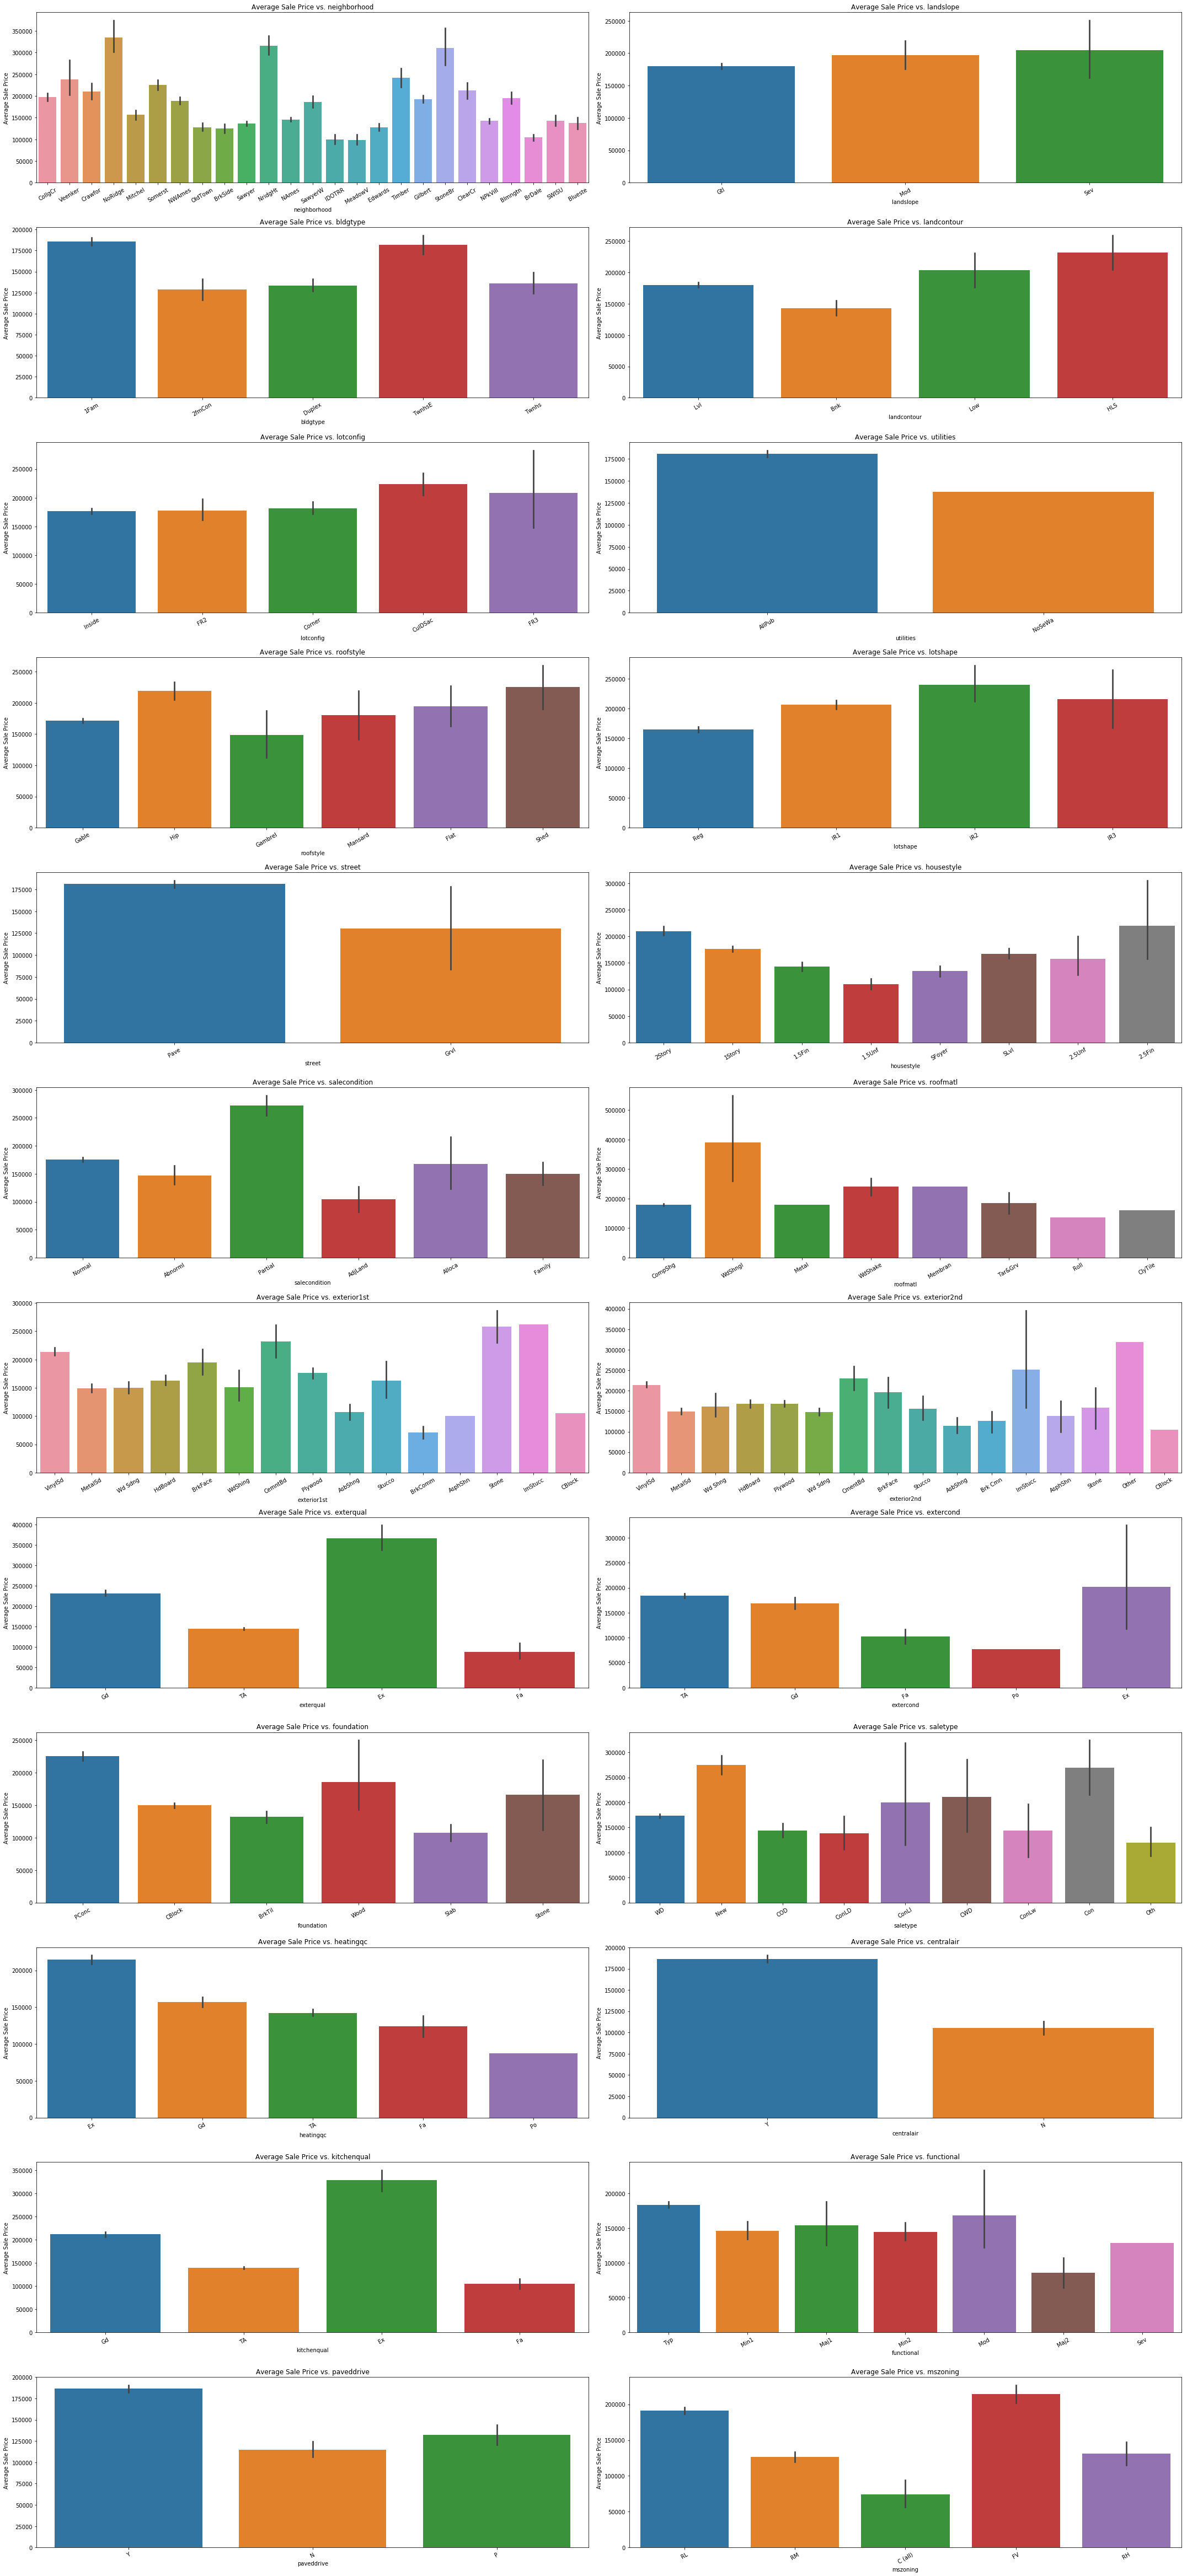

In [13]:
plt.figure(figsize=(30, 65))

selected_cat_cols = ['neighborhood', 'landslope', 'bldgtype', 'landcontour', 'lotconfig', 'utilities', 'roofstyle', 'lotshape', 'street', 'housestyle', 'salecondition', 'roofmatl', 'exterior1st', 'exterior2nd', 'exterqual', 'extercond', 'foundation', 'saletype', 'heatingqc', 'centralair', 'kitchenqual', 'functional', 'paveddrive', 'mszoning']

for index, column in enumerate(selected_cat_cols):
    plt.subplot(12, 2, index+1)
    sns.barplot(data = house_df, x = column, y = 'saleprice')
    plt.title('Average Sale Price vs. {}'.format(column))
    plt.ylabel("Average Sale Price")
    plt.xlabel(column)
    plt.xticks(rotation = 30)

plt.tight_layout();

From the plots displayed above, the variables 'exterqual', 'kitchenqual', and 'mszoning' were selected for the modeling stage since they display significant variability in sale price between the levels or options

Due to the non-numeric nature of the variables just mentioned, the engineering of new features using 'One Hot Encoding' was done for each of the three variables

In [14]:
house_df = pd.concat([house_df,pd.get_dummies(house_df['exterqual'], prefix = 'exterqual_dummy', drop_first=True)], axis = 1)
house_df = pd.concat([house_df,pd.get_dummies(house_df['kitchenqual'], prefix = 'kitchenqual_dummy', drop_first=True)], axis = 1)
house_df = pd.concat([house_df,pd.get_dummies(house_df['mszoning'], prefix = 'mszoning_dummy', drop_first=True)], axis = 1)

### Modeling - Regression

In [17]:
X = house_df[['overallqual', 'grlivarea', 'garagearea', 'firstflrsf', 'totrmsabvgrd', 'exterqual_dummy_Fa', 'exterqual_dummy_Gd', 'exterqual_dummy_TA', 'kitchenqual_dummy_Fa', 'kitchenqual_dummy_Gd', 'kitchenqual_dummy_TA', 'mszoning_dummy_FV', 'mszoning_dummy_RH', 'mszoning_dummy_RL', 'mszoning_dummy_RM']]
Y = house_df['saleprice']

In [18]:
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     372.1
Date:                Mon, 30 Sep 2019   Prob (F-statistic):               0.00
Time:                        18:14:15   Log-Likelihood:                -17389.
No. Observations:                1460   AIC:                         3.481e+04
Df Residuals:                    1444   BIC:                         3.489e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.949e+04   1.62e+04      1.202      0.229   -1.23e+04    5.13e+04
overallqual           1.776e+04   1192.387     14.892      0.000    1.54e+04    2.01e+04
grlivarea               47.6157      3.904     12.197      0.000      39.958      55.273
garagearea              46.6899      5.828      8.011      0.000      35.258      58.122
firstflrsf              18.1466      3.355      5.409      0.000      11.566      24.727
totrmsabvgrd         -1781.2715   1066.953     -1.669      0.095   -3874.216     311.673
exterqual_dummy_Fa   -4.414e+04    1.3e+04     -3.385      0.001   -6.97e+04   -1.86e+04
exterqual_dummy_Gd   -3.703e+04   6396.874     -5.789      0.000   -4.96e+04   -2.45e+04
exterqual_dummy_TA   -5.053e+04   7057.046     -7.161      0.000   -6.44e+04   -3.67e+04
kitchenqual_dummy_Fa -4.928e+04   8295.990     -5.940      0.000   -6.56e+04    -3.3e+04
kitchenqual_dummy_Gd  -3.72e+04   4776.009     -7.789      0.000   -4.66e+04   -2.78e+04
kitchenqual_dummy_TA -4.685e+04   5349.190     -8.758      0.000   -5.73e+04   -3.64e+04
mszoning_dummy_FV      2.94e+04   1.29e+04      2.276      0.023    4059.231    5.47e+04
mszoning_dummy_RH     2.051e+04   1.48e+04      1.387      0.166   -8499.312    4.95e+04
mszoning_dummy_RL     3.728e+04    1.2e+04      3.106      0.002    1.37e+04    6.08e+04
mszoning_dummy_RM     1.652e+04   1.21e+04      1.362      0.174   -7279.047    4.03e+04
==============================================================================
Omnibus:                      579.026   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            67919.197
Skew:                          -0.823   Prob(JB):                         0.00
Kurtosis:                      36.373   Cond. No.                     5.96e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""